# **A SMALL TRY TO UNDERSTAND STOCK BEHAVIOUR**

- Each person have different personality and behaviour, similarly each stock have personality and behaviour




**CAN WE PROVE IT?** <br>
Before answering, let me tell you about **how machine predict your behaviour**.

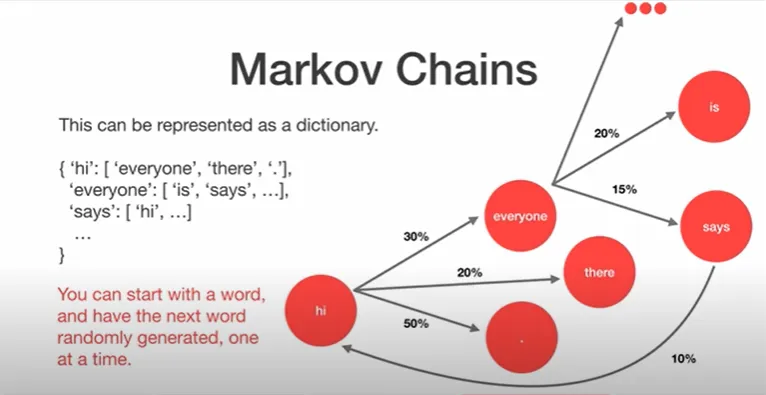

**EXAMPLE**: Google Typing, Search Engine, Ecommerce Recommendation, Movie Recommendation, Etc

In [ ]:
# INSTALLING REQUIREMENTS
!pip install backtesting
import yfinance as yf
import numpy as np
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.4/191.4 kB 6.3 MB/s eta 0:00:00


In [ ]:
# DOWNLOADING REQUIRED DATA FROM YAHOO FINANCE
ticker = "INFY.NS" # CRSLDX
# Supported Time Format: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
data = yf.download(ticker, period='max', interval='1d', actions=True)

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFY.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [ ]:
data['daily_returns'] = data['Close'].pct_change()*100
data['state'] = np.where(data['daily_returns'] > 0, 'UP', 'DOWN')
data['prev_state'] = data['state'].shift(1)
data['state_int'] = np.where(data['daily_returns'] > 0, 1, -1)
print(data.head(10))

def calculate_state_probabilities(data: pd.DataFrame):

    # Identify Gap Up and Gap Down states
    data['gap_up'] = (data['Open'] > data['High'].shift(1))
    data['gap_down'] = (data['Open'] < data['Low'].shift(1))
    results_gap = data.groupby(['prev_state', 'gap_up', 'gap_down', 'state'])
    # .agg({"state": 'count', "daily_returns": 'sum'})
        # 'state_int': 'sum',
        # 'Dividends': 'sum',
        # 'Stock Splits': 'sum',
        # 'Open': 'first',
        # 'High': 'max',
        # 'Low': 'min',
        # 'Close': 'last'
    # })

    return results_gap

state_counts = calculate_state_probabilities(data)
# search = ('DOWN', False, True, 'DOWN')
# up_prob = state_counts[search]/state_counts[search[:-1]].sum()
# print("\nUP PROBABILITY: ", up_prob)
# print("DOWN PROBABILITY: ", 1 - up_prob)

Empty DataFrame
Columns: [(Adj Close, INFY.NS), (Close, INFY.NS), (High, INFY.NS), (Low, INFY.NS), (Open, INFY.NS), (Volume, INFY.NS), (daily_returns, ), (state, ), (prev_state, ), (state_int, )]
Index: []


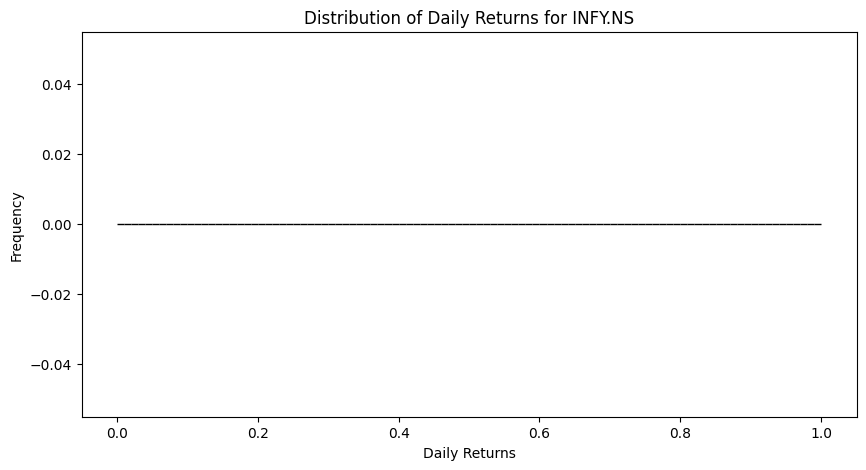

In [ ]:
# @title Distribution of Daily Returns for INFY.NS

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(data['daily_returns'], bins=100, edgecolor='black')
plt.title('Distribution of Daily Returns for INFY.NS')
plt.xlabel('Daily Returns')
_ = plt.ylabel('Frequency')


**UP AND DOWN PROBABILITY**

In [ ]:
# FINDING UP and DOWN PROBABILITY

import pandas as pd

def calculate_state_probabilities(data: pd.DataFrame) -> dict:
    """
    Calculate the probability of 'UP' and 'DOWN' states in the given data.

    Parameters:
    - data: A DataFrame containing a 'state' column with values 'UP' or 'DOWN'.

    Returns:
    - A dictionary with probabilities of 'UP' and 'DOWN' states.
    """
    total_counts = len(data)
    up_counts = (data['state'] == 'UP').sum()
    down_counts = (data['state'] == 'DOWN').sum()

    up_probability = up_counts / total_counts if total_counts else 0
    down_probability = down_counts / total_counts if total_counts else 0

    return {
        'UP Probability': up_probability,
        'DOWN Probability': down_probability
    }

def main(data):

    probabilities = calculate_state_probabilities(data)

if __name__ == "__main__":
    main(data)

total_counts = len(data)
up_counts = len(data[data['state'] == 'UP'])
down_counts = len(data[data['state'] == 'DOWN'])
print(f'UP Probability: {up_counts/total_counts} :: Down Probability: {down_counts/total_counts}')

ZeroDivisionError: division by zero

**TRANSITION MATRIX**

In [ ]:
# Use parentheses to correctly filter the DataFrame and calculate proportions
import pandas as pd
if up_counts > 0 and down_counts > 0:
  up_to_up = len(data[(data['state'] == 'UP') & (data['state'].shift(1) == 'UP')]) / up_counts
  up_to_down = len(data[(data['state'] == 'DOWN') & (data['state'].shift(1) == 'UP')]) / down_counts
  down_to_up = len(data[(data['state'] == 'UP') & (data['state'].shift(1) == 'DOWN')]) / up_counts
  down_to_down = len(data[(data['state'] == 'DOWN') & (data['state'].shift(1) == 'DOWN')]) / down_counts
  transition_matrix = pd.DataFrame({
    'UP': [up_to_up, up_to_down],
    'DOWN': [down_to_up, down_to_down]
    }, index=['UP', 'DOWN'])
  print(transition_matrix)

**FINDING PROBABILITY AFTER 5 CONSECUTIVE DOWN**

In [ ]:
pct1 = len(data[(data['state'] == 'UP') & (data['state'].shift(-1) == 'DOWN') & (data['state'].shift(-2) == 'DOWN') & (data['state'].shift(-3) == 'DOWN') & (data['state'].shift(-4) == 'DOWN') & (data['state'].shift(-5) == 'DOWN')]) / len(data[(data['state'].shift(1) == 'DOWN') & (data['state'].shift(2) == 'DOWN') & (data['state'].shift(3) == 'DOWN') & (data['state'].shift(4) == 'DOWN') & (data['state'].shift(5) == 'DOWN')])
pct2 = len(data[(data['state'] == 'DOWN') & (data['state'].shift(-1) == 'DOWN') & (data['state'].shift(-2) == 'DOWN') & (data['state'].shift(-3) == 'DOWN') & (data['state'].shift(-4) == 'DOWN') & (data['state'].shift(-5) == 'DOWN')]) / len(data[(data['state'].shift(1) == 'DOWN') & (data['state'].shift(2) == 'DOWN') & (data['state'].shift(3) == 'DOWN') & (data['state'].shift(4) == 'DOWN') & (data['state'].shift(5) == 'DOWN')])
print('5 DAYS HISTORICAL DATA: (DOWN, DOWN, DOWN, DOWN, DOWN)')
print(f'Probability of 6th Day: \n\t UP Probability: {pct1} :: DOWN Probability: {pct2}')

ZeroDivisionError: division by zero

**KENNY FRATIONAL ALGORITHM FOR EFFICIENT ASSET ALLOCATION**

In [ ]:
import numpy as np

def fractional_kelly(mu, sigma, r_f, b):
    """
    Calculate the optimal fraction of bankroll to allocate to each stock
    using the Fractional Kelly Criterion.

    Parameters:
    mu (array): expected returns of each stock
    sigma (array): volatilities of each stock
    r_f (float): risk-free rate
    b (array): odds or probabilities of each stock going up

    Returns:
    f (array): optimal fractions of bankroll to allocate to each stock
    """
    f = (b * (mu - r_f) / (sigma**2)) / (1 + (b * (mu - r_f) / (sigma**2)))
    return f

# Example usage
mu = np.array([0.02])  # expected returns
sigma = np.array([0.3])  # volatilitiest
r_f = 0.0  # risk-free rate
b = np.array([0.6])  # odds or probabilities

f = fractional_kelly(mu, sigma, r_f, b)
print(f)

[0.11764706]


**REPLACING**
- **`UP ==>> 1`**
- **`DOWN ==>> 0`**

In [ ]:
import pandas as pd
import numpy as np
import itertools
import yfinance as yf

ticker = "ABB.ns" # CRSLDX
data = yf.download(ticker, period='max', interval='1d')
# FINDING DAILY RETURNS
data['daily_returns'] = data['Close'].pct_change()
data['state'] = np.where(data['daily_returns'] > 0, 'UP', 'DOWN')

# assume 'df' is your Pandas DataFrame with 'pct_change' and 'tate' columns
df = data

n = 3  # number of states
cond_probs = {}
# iterate over each combination
for n_states in range(1, n+1):
    # generate all possible combinations of states
    combinations = list(itertools.product(['UP', 'DOWN'], repeat=n_states))

    # iterate over each combination
    for combo in combinations:
        # convert the combination to a tuple (hashable) for indexing
        combo_tuple = tuple(combo)

        # find the occurrence of this combination in the historical data
        combo_occurrence = 0
        up_after_combo = 0
        down_after_combo = 0
        for i in range(len(df) - n_states):
            window = tuple(df['state'].iloc[i:i+n_states])
            if window == combo_tuple:
                combo_occurrence += 1
                if df['state'].iloc[i+n_states] == 'UP':
                    up_after_combo += 1
                else:
                    down_after_combo += 1
                # if gap not None:


        # calculate the conditional probability of up and down after this combination
        if combo_occurrence > 0:
            prob_up_after_combo = up_after_combo / combo_occurrence
            prob_down_after_combo = down_after_combo / combo_occurrence
        else:
            prob_up_after_combo = 0
            prob_down_after_combo = 0

        # store the conditional probabilities in the dictionary
        code = "".join('1' if x == 'UP' else '0' for x in combo_tuple)
        cond_probs[code] = {'UP': prob_up_after_combo, 'DOWN': prob_down_after_combo, 'OCCURANCE': combo_occurrence, 'PATTERN': combo_tuple}

# print the results
print('\nCONDITIONAL PROBABILITY')
for combo, probs in cond_probs.items():
    # fraction_bet = fractional_kelly(mu=np.array([0.02]), sigma=np.array([0.03]), r_f=0.0, b=np.array(max([probs['UP'], probs['DOWN']])))
    # if probs['UP'] >= 0.6 or probs['DOWN'] >= 0.6:
    print(f"DETAILED ANALYSIS: {combo} :: OCCURANCE: {probs['OCCURANCE']} UP: {probs['UP']:.3f} :: DOWN: {probs['DOWN']:.3f} ")

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')



CONDITIONAL PROBABILITY
DETAILED ANALYSIS: 1 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 0 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 11 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 10 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 01 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 00 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 111 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 110 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 101 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 100 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 011 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 010 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 001 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 
DETAILED ANALYSIS: 000 :: OCCURANCE: 0 UP: 0.000 :: DOWN: 0.000 


**MAKE A TEMPLATE**

In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

class MARKOV_PROBABILITY:

  def __init__(self, ticker, start, end, interval, visualize = True, normal_distribution = True) -> None:
    self.ticker = ticker
    self.start = start
    self.end = end
    self.interval = interval
    self.n = 4
    self.cond_probs = dict()
    self.visualize = visualize
    self.all_code_data = pd.DataFrame()
    self.normal_distribution = normal_distribution

  def get_data(self):
    self.data = yf.download(self.ticker, self.start, self.end, interval = self.interval)

  def daily_return(self):
    # FINDING DAILY RETURNS
    self.data['daily_returns'] = self.data['Close'].pct_change()*100
    self.data['state'] = np.where(self.data['daily_returns'] >= 0, 'UP', 'DOWN')

  def find_up_down(self):
    # FINDING DIFFERENT IMPORTANT DATA
    self.total_counts = len(self.data)
    self.up_counts = len(self.data[self.data['state'] == 'UP'])
    self.down_counts = len(self.data[self.data['state'] == 'DOWN'])

  def find_prob(self):
    self.up_prob = (self.up_counts / self.total_counts)
    self.down_prob = (self.down_counts / self.total_counts)
    print(f'UPWARD PROBABILITY: {self.up_prob}')
    print(f'DOWNWARD PROBABILITY: {self.down_prob}')

  def visualize_returns(self):
    if self.visualize:
      plt.figure(figsize=(15, 6))
      plt.hist(self.data['daily_returns'], bins=np.arange(-25, 25, 1), color='skyblue', edgecolor='black')
      plt.xlabel('Daily Returns')
      plt.ylabel('Frequency')
      plt.title('Distribution of Daily Returns')
      plt.grid(True)
      plt.show()


  def fractional_kenny(self, mu, sigma, r_f, b):
    f = (b * (mu - r_f) / (sigma**2)) / (1 + (b * (mu - r_f) / (sigma**2)))
    return f

  def calculate_state_probabilities(self, combo_tuple):
    # store the conditional probabilities in the dictionary
    code = "".join('1' if x == 'UP' else '0' for x in combo_tuple)
    return code

  def strategy(self):

    # Use parentheses to correctly filter the DataFrame and calculate proportions
    if self.up_counts > 0 and self.down_counts > 0:

        # iterate over each combination
        for n_states in range(1, self.n+1):

            # generate all possible combinations of states
            combinations = list(itertools.product(['UP', 'DOWN'], repeat=n_states))

            # iterate over each combination
            for combo in combinations:

                # convert the combination to a tuple (hashable) for indexing
                combo_tuple = tuple(combo)

                # find the occurrence of this combination in the historical data
                combo_occurrence = 0
                up_after_combo = 0
                down_after_combo = 0

                for i in range(len(self.data) - n_states):
                    window = tuple(self.data['state'].iloc[i:i+n_states])
                    if window == combo_tuple:
                        combo_occurrence += 1
                        if self.data['state'].iloc[i+n_states] == 'UP':
                            up_after_combo += 1
                        else:
                            down_after_combo += 1

                # calculate the conditional probability of up and down after this combination
                if combo_occurrence > 0:
                    prob_up_after_combo = up_after_combo / combo_occurrence
                    prob_down_after_combo = down_after_combo / combo_occurrence

                else:
                    prob_up_after_combo = 0
                    prob_down_after_combo = 0

  def print_prob(self):
    print('\nCONDITIONAL PROBABILITY')
    for combo, probs in self.cond_probs.items():
      if probs['UP'] >= max(self.up_prob,  self.down_prob) or probs['DOWN'] >= max(self.up_prob,  self.down_prob):
        # fraction_bet = fractional_kelly(mu=np.array([self.data['daily_returns'].mean()]), sigma=np.array([self.data['daily_returns'].std()]), r_f=0.0, b=np.array(max([probs['UP'], probs['DOWN']])))
        print(f"DETAILED ANALYSIS: {combo} :: OCCURANCE: {probs['OCCURANCE']} UP: {probs['UP']:.3f} :: DOWN: {probs['DOWN']:.3f}")  # :: ALLOCATION: {fraction_bet[0]:.2%}

  def main(self):
    self.get_data()
    self.daily_return()
    self.find_up_down()
    self.find_prob()
    self.visualize_returns()
    self.strategy()
    self.print_prob()

**Changes of Stock Behaviour**

*   Optimize the Code
*   Conditional Probability Dictionary Function
*   Ticker / Code / Up_Prob / Down_Prob  

**INSTANCE OF CLASS**

In [15]:
INSTANCE = MARKOV_PROBABILITY('ONGC.NS', '2000-01-01', '2024-12-31', '1d')
INSTANCE.main()

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ONGC.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


ZeroDivisionError: division by zero

In [ ]:
# prompt: Write a code for monte carlo simulation based on a probability i will enter. make a function and call it using an input parameter as probability.

import random

def monte_carlo_simulation(probability, num_trials):
    """
    Runs a Monte Carlo simulation based on a given probability.

    Args:
        probability: The probability of an event occurring (between 0 and 1).
        num_trials: The number of trials to run.

    Returns:
        A dictionary containing the number of successes and failures.
    """

    successes = 0
    failures = 0
    for _ in range(num_trials):
        if random.random() < probability:
            successes += 1
        else:
            failures += 1
    return {"successes": successes, "failures": failures}

# Get probability input from the user
try:
    probability = float(input("Enter the probability (between 0 and 1): "))
    if not 0 <= probability <= 1:
        raise ValueError
except ValueError:
    print("Invalid probability. Please enter a number between 0 and 1.")
else:
    # Run the simulation with 10000 trials
    results = monte_carlo_simulation(probability, 10000)

    # Print the results
    print(f"Number of successes: {results['successes']}")
    print(f"Number of failures: {results['failures']}")


Enter the probability (between 0 and 1): 0.66
Number of successes: 6564
Number of failures: 3436


**BHAV BHAGVAN HEIN**

**GAPS WITH TRANSITION PROBABILITY**: ANOTHER WAY TO IDENTIFY BEHAVIOUR OF STOCKS

In [11]:
# prompt: Hey, I need to download the data using yfinance library and save that data into the sql table using python, I need to query the sql table and see the table, the table structure should be automatically created using the pandas dataframe structure. each stock data must have a different table, rename the table using "stock_name interval"

import yfinance as yf
import pandas as pd
import sqlite3

def download_and_store_stock_data(ticker, period="max", interval="1d"):
    """Downloads stock data using yfinance and stores it in an SQLite database."""
    try:
        # Download data
        data = yf.download(ticker, period=period, interval=interval)

        if data.empty:
            print(f"No data found for {ticker}")
            return

        # Calculate daily returns, state, prev_state, gap_up, and gap_down
        data['daily_returns'] = data['Close'].pct_change() * 100
        # data['daily_returns'] = data['daily_returns'].clip(lower=1, upper=100) # Ensure daily returns are between 1 and 100
        data['state'] = data['daily_returns'].apply(lambda x: 'UP' if x > 0 else 'DOWN')
        data['prev_state'] = data['state'].shift(1)
        data['gap_up'] = (data['Open'] > data['High'].shift(1)).astype(bool)
        data['gap_down'] = (data['Open'] < data['Low'].shift(1)).astype(bool)
        print(len(data))

        filtered = data[
            (data['prev_state'] == 'DOWN') &
            (data['gap_up'] == False) &
            (data['gap_down'] == True) &
            (data['state'] == 'DOWN')
        ]

        print('Compare Filter: ', len(filtered))
        
        # Create table name
        table_name = f"{ticker.replace('.', '_')}_{interval}"

        # Converted from multi-index to simple index
        data.columns = [col[0] for col in data.columns]

        # Connect to SQLite database (or create it if it doesn't exist)
        conn = sqlite3.connect('stock_data.db')
        cursor = conn.cursor()

        # Create table based on DataFrame structure (if it doesn't exist)
        data.to_sql(table_name, conn, if_exists='replace', index=True, index_label='Date')

        # Query and print the table
        query = f"""
            SELECT prev_state, gap_up, gap_down, state, COUNT(*) AS count, SUM(daily_returns) AS cum_returns, AVG(daily_returns) AS average
            FROM {table_name} where prev_state IS NOT NULL
            GROUP BY prev_state, gap_up, gap_down, state;
        """

        data = pd.read_sql_query(query, conn)
        print(f"\nTable '{table_name}' created successfully in stock_data.db")

        # return data.set_index(['prev_state', 'gap_up', 'gap_down', 'state'])
        return data

    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if conn:
            conn.close()

In [12]:
# Example usage:
Insights = download_and_store_stock_data("INFY.NS", interval="1d")
Insights

[*********************100%***********************]  1 of 1 completed

7386
Compare Filter:  465

Table 'INFY_NS_1d' created successfully in stock_data.db


,prev_state,gap_up,gap_down,state,count,cum_returns,average
0,DOWN,0,0,DOWN,1235,-1631.865978,-1.321349
1,DOWN,0,0,UP,1437,2195.140239,1.527585
2,DOWN,0,1,DOWN,465,-1090.947515,-2.346124
3,DOWN,0,1,UP,173,236.035124,1.364365
4,DOWN,1,0,DOWN,81,-103.410437,-1.276672
5,DOWN,1,0,UP,235,629.188374,2.677397
6,UP,0,0,DOWN,1429,-1784.907164,-1.249060
7,UP,0,0,UP,1226,1774.882764,1.447702
8,UP,0,1,DOWN,180,-387.245362,-2.151363
9,UP,0,1,UP,59,68.519085,1.161340


**THERE ARE MANY PERMUTATIONS AND COMBINATIONS YET TO BE DISCOVER**

In [ ]:
import yfinance as yf

# Nifty 50 stock symbols as a dictionary
nifty_50_stocks = {
    'Adani Enterprises': 'ADANIENT.NS',
    'Adani Ports & SEZ': 'ADANIPORTS.NS',
    'Apollo Hospitals': 'APOLLOHOSP.NS',
    'Asian Paints': 'ASIANPAINT.NS',
    'Axis Bank': 'AXISBANK.NS',
    'Bajaj Auto': 'BAJAJ-AUTO.NS',
    'Bajaj Finance': 'BAJFINANCE.NS',
    'Bajaj Finserv': 'BAJAJFINSV.NS',
    'Bharat Electronics': 'BEL.NS',
    'Bharat Petroleum': 'BPCL.NS',
    'Bharti Airtel': 'BHARTIARTL.NS',
    'Britannia Industries': 'BRITANNIA.NS',
    'Cipla': 'CIPLA.NS',
    'Coal India': 'COALINDIA.NS',
    'Dr. Reddy\'s Laboratories': 'DRREDDY.NS',
    'Eicher Motors': 'EICHERMOT.NS',
    'Grasim Industries': 'GRASIM.NS',
    'HCLTech': 'HCLTECH.NS',
    'HDFC Bank': 'HDFCBANK.NS',
    'HDFC Life': 'HDFCLIFE.NS',
    'Hero MotoCorp': 'HEROMOTOCO.NS',
    'Hindalco Industries': 'HINDALCO.NS',
    'Hindustan Unilever': 'HINDUNILVR.NS',
    'ICICI Bank': 'ICICIBANK.NS',
    'IndusInd Bank': 'INDUSINDBK.NS',
    'Infosys': 'INFY.NS',
    'ITC': 'ITC.NS',
    'JSW Steel': 'JSWSTEEL.NS',
    'Kotak Mahindra Bank': 'KOTAKBANK.NS',
    'Larsen & Toubro': 'LT.NS',
    'Mahindra & Mahindra': 'M&M.NS',
    'Maruti Suzuki': 'MARUTI.NS',
    'Nestlé India': 'NESTLEIND.NS',
    'NTPC': 'NTPC.NS',
    'Oil and Natural Gas Corporation': 'ONGC.NS',
    'Power Grid': 'POWERGRID.NS',
    'Reliance Industries': 'RELIANCE.NS',
    'SBI Life Insurance Company': 'SBILIFE.NS',
    'Shriram Finance': 'SHRIRAMFIN.NS',
    'State Bank of India': 'SBIN.NS',
    'Sun Pharma': 'SUNPHARMA.NS',
    'Tata Consultancy Services': 'TCS.NS',
    'Tata Consumer Products': 'TATACONSUM.NS',
    'Tata Motors': 'TATAMOTORS.NS',
    'Tata Steel': 'TATASTEEL.NS',
    'Tech Mahindra': 'TECHM.NS',
    'Titan Company': 'TITAN.NS',
    'Trent': 'TRENT.NS',
    'UltraTech Cement': 'ULTRACEMCO.NS',
    'Wipro': 'WIPRO.NS'
}

# Function to verify stock symbols
def verify_symbols(symbols):
    for company, symbol in symbols.items():
        try:
            stock = yf.Ticker(symbol)
            stock_info = stock.history(period="1d")  # Fetching 1 day of data
            if stock_info.empty:
                print(f"Symbol {symbol} for {company} is not valid.")
            else:
                print(f"Symbol {symbol} for {company} is valid.")
        except Exception as e:
            print(f"Error with symbol {symbol} for {company}: {e}")

# Verify Nifty 50 symbols
verify_symbols(nifty_50_stocks)


Symbol ADANIENT.NS for Adani Enterprises is valid.
Symbol ADANIPORTS.NS for Adani Ports & SEZ is valid.
Symbol APOLLOHOSP.NS for Apollo Hospitals is valid.
Symbol ASIANPAINT.NS for Asian Paints is valid.
Symbol AXISBANK.NS for Axis Bank is valid.
Symbol BAJAJ-AUTO.NS for Bajaj Auto is valid.
Symbol BAJFINANCE.NS for Bajaj Finance is valid.
Symbol BAJAJFINSV.NS for Bajaj Finserv is valid.
Symbol BEL.NS for Bharat Electronics is valid.
Symbol BPCL.NS for Bharat Petroleum is valid.
Symbol BHARTIARTL.NS for Bharti Airtel is valid.
Symbol BRITANNIA.NS for Britannia Industries is valid.
Symbol CIPLA.NS for Cipla is valid.
Symbol COALINDIA.NS for Coal India is valid.
Symbol DRREDDY.NS for Dr. Reddy's Laboratories is valid.
Symbol EICHERMOT.NS for Eicher Motors is valid.
Symbol GRASIM.NS for Grasim Industries is valid.
Symbol HCLTECH.NS for HCLTech is valid.
Symbol HDFCBANK.NS for HDFC Bank is valid.
Symbol HDFCLIFE.NS for HDFC Life is valid.
Symbol HEROMOTOCO.NS for Hero MotoCorp is valid.
Sy